## Implementación de clasificadores en Keras

Primero implementamos transfer learning con resnet-50 a modo de introducción.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory('C:/Users/Jose Giner/OneDrive/Escritorio/AIV/Practica 2/dataset-cifar10/train', 
                                                                       label_mode='categorical',
                                                                       shuffle=True, 
                                                                       seed = 1337,
                                                                       batch_size=32, 
                                                                       image_size=(150,150))
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory('C:/Users/Jose Giner/OneDrive/Escritorio/AIV/Practica 2/dataset-cifar10/val', 
                                                                         label_mode='categorical',
                                                                         shuffle=True, 
                                                                         seed = 1337,
                                                                         batch_size=32, 
                                                                         image_size=(150,150))
test_dataset = tf.keras.preprocessing.image_dataset_from_directory('C:/Users/Jose Giner/OneDrive/Escritorio/AIV/Practica 2/dataset-cifar10/test', 
                                                                   label_mode='categorical',
                                                                   shuffle=True, 
                                                                   seed = 1337,
                                                                   batch_size=32, 
                                                                   image_size=(150,150))

Found 5000 files belonging to 10 classes.
Found 5000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


In [3]:
premodel = keras.applications.ResNet50(weights='imagenet', 
                                       input_shape=(150,150, 3), 
                                       include_top=False)

In [4]:
premodel.trainable = False
inputs = keras.Input(shape = (150,150, 3))
x = tf.keras.applications.resnet50.preprocess_input(inputs)
x = premodel(x, training=False)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)

In [6]:
model = keras.Model(inputs, outputs)

In [7]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=keras.metrics.Accuracy())

In [8]:
model.fit(training_dataset, 
          batch_size=32, 
          epochs=10, 
          validation_data=validation_dataset)

Epoch 1/10
157/157 [==============================] - 231s 1s/step - loss: 0.1324 - accuracy: 0.5467 - val_loss: 0.1194 - val_accuracy: 0.6447
Epoch 2/10
157/157 [==============================] - 232s 1s/step - loss: 0.1131 - accuracy: 0.6744 - val_loss: 0.1136 - val_accuracy: 0.7051
Epoch 3/10
157/157 [==============================] - 234s 1s/step - loss: 0.1011 - accuracy: 0.7237 - val_loss: 0.1016 - val_accuracy: 0.7535
Epoch 4/10
157/157 [==============================] - 235s 2s/step - loss: 0.0901 - accuracy: 0.7812 - val_loss: 0.1029 - val_accuracy: 0.7745
Epoch 5/10
157/157 [==============================] - 234s 1s/step - loss: 0.0877 - accuracy: 0.8056 - val_loss: 0.0941 - val_accuracy: 0.8028
Epoch 6/10
157/157 [==============================] - 232s 1s/step - loss: 0.0860 - accuracy: 0.8249 - val_loss: 0.0961 - val_accuracy: 0.8071
Epoch 7/10
157/157 [==============================] - 232s 1s/step - loss: 0.0900 - accuracy: 0.8363 - val_loss: 0.0883 - val_accuracy: 0.8279

In [9]:
loss, acc = model.evaluate(test_dataset)

32/32 [==============================] - 23s 726ms/step - loss: 0.0916 - accuracy: 0.8487


In [10]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

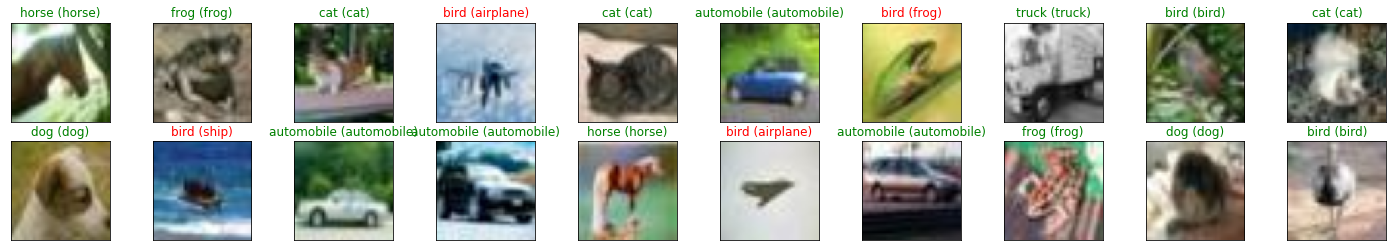

In [93]:
import matplotlib.pyplot as plt

dataiter = iter(test_dataset)
images, labels = dataiter.next()

predictions = model.predict(images)
preds = np.argmax(predictions, axis = 1)
labels = np.argmax(labels, axis = 1)


fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(images[idx].numpy().astype("uint8"))
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
             color=("green" if preds[idx]==labels[idx].item() else "red"))


### Utilizando transfer learning con diferentes configuraciones para clasificación de objetos

In [5]:
import os
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten , BatchNormalization
from pathlib import Path
from sklearn.metrics import accuracy_score, f1_score

In [6]:
BATCH_SIZE = 32

train_generator = ImageDataGenerator(rotation_range=90, 
                                     horizontal_flip=True, 
                                     vertical_flip=True,
                                     preprocessing_function=preprocess_input) # VGG16 preprocessing

valid_generator = ImageDataGenerator(preprocessing_function=preprocess_input) # VGG16 preprocessing

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input) # VGG16 preprocessing

In [7]:
download_dir = Path('C:/Users/Jose Giner/OneDrive/Escritorio/AIV/Practica 2/dataset-cifar10/')

In [8]:
train_data_dir = download_dir/'train'
valid_data_dir = download_dir/'val'
test_data_dir = download_dir/'test'

classes_cifar = os.listdir(download_dir/'train')

In [9]:
traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(32, 32),
                                               class_mode='categorical',
                                               classes=classes_cifar,
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=562)

validgen = valid_generator.flow_from_directory(valid_data_dir,
                                               target_size=(32, 32),
                                               class_mode='categorical',
                                               classes=classes_cifar,
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=562)

testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(32, 32),
                                             class_mode='categorical',
                                             classes=classes_cifar,
                                             batch_size=BATCH_SIZE,
                                             shuffle=False,
                                             seed=562)

Found 5000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


Primero implementaremos la arquitectura de VGG-16

In [10]:
def create_model(input_shape, optimizer,loss_criterion, fine_tune=0):
    """
    Compila un modelo entrenado con las capas de VGG-16
    
    input_shape: tupla - tamaño de las imágenes de entrada en forma (width, height, channels)
    optimizer: string - optimizador a utilizar en el entrenamiento para la actualización de pesos en el proceso de backpropagation'
    loss_criterion: string - función de pérdida para medir el rendimiento de la red
    fine_tune: int - Número de capas del modelo preentrenado a entrenar.
                Si es 0, todas las capas preentrenadas se 'congelan' en el entrenamiento
    """
    
    # Las capas preentrenadas utilizan en este caso pesos del dataset de imagenet.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    model_pre = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in model_pre.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in model_pre.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = model_pre.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.25)(top_model)
    
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.25)(top_model)
    output_layer = Dense(10, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=model_pre.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss=loss_criterion,
                  metrics=['accuracy'])
    
    return model

In [11]:
input_shape = (32, 32, 3)
optim_1 =  tf.keras.optimizers.Adam(learning_rate=0.001)
criterion1 = 'categorical_crossentropy'

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 30

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, optim_1, criterion1, fine_tune=0)

In [12]:
from livelossplot.tf_keras import PlotLossesCallback

plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.vgg16',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=15,
                           restore_best_weights=True,
                           mode='min')

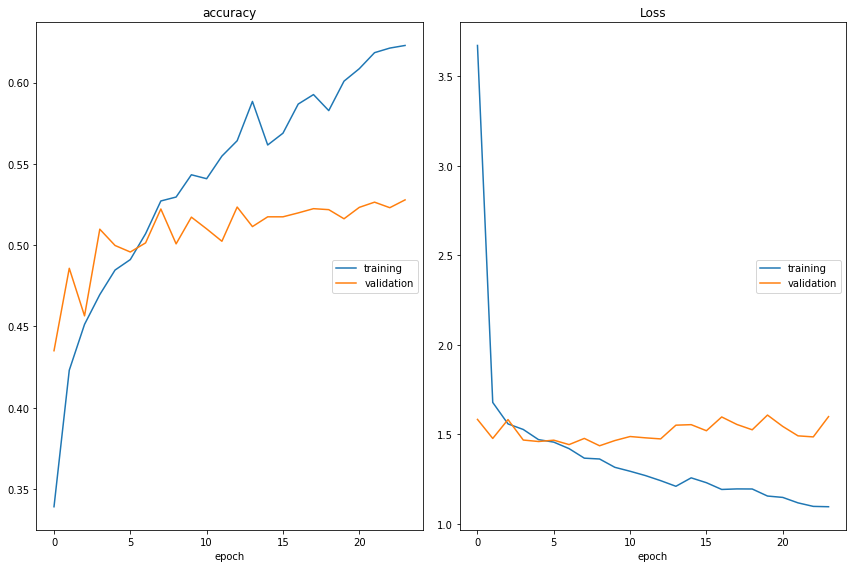

accuracy
	training         	 (min:    0.339, max:    0.623, cur:    0.623)
	validation       	 (min:    0.435, max:    0.528, cur:    0.528)
Loss
	training         	 (min:    1.096, max:    3.672, cur:    1.096)
	validation       	 (min:    1.436, max:    1.608, cur:    1.599)
156/156 [==============================] - 31s 197ms/step - loss: 1.0957 - accuracy: 0.6228 - val_loss: 1.5990 - val_accuracy: 0.5278


In [10]:
vgg_history = vgg_model.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

In [13]:
vgg_model.load_weights('tl_model_v1.weights.best.vgg16') # initialize the best trained weights

true_classes = testgen.classes
class_indices = traingen.class_indices
print(class_indices)
class_indices = dict((v,k) for k,v in class_indices.items())

vgg_preds = vgg_model.predict(testgen)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [14]:
results = {'Modelo': [], 'Accuracy':[], 'Weighted F1-score':[]}

vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("Precisión del modelo VGG16 sin capas entrenadas: {:.2f}%".format(vgg_acc * 100))

results['Modelo'].append('VGG16-Adam(lr = 0.001)-ccl-ft0')
results["Accuracy"].append(round(vgg_acc,3))
results["Weighted F1-score"].append(round(f1_score(true_classes, vgg_pred_classes, average = 'weighted'),3))


Precisión del modelo VGG16 sin capas entrenadas: 48.80%


In [12]:
results

{'Modelo': ['VGG16-Adam(lr = 0.001)-ccl-ft0'],
 'Accuracy': [0.488],
 'Weighted F1-score': [0.482]}

In [15]:
# Reset our image data generators
traingen.reset()
validgen.reset()
testgen.reset()

# Use a smaller learning rate
optim_2 = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tuning
vgg_model_ft = create_model(input_shape, optim_2, criterion1, fine_tune=2)

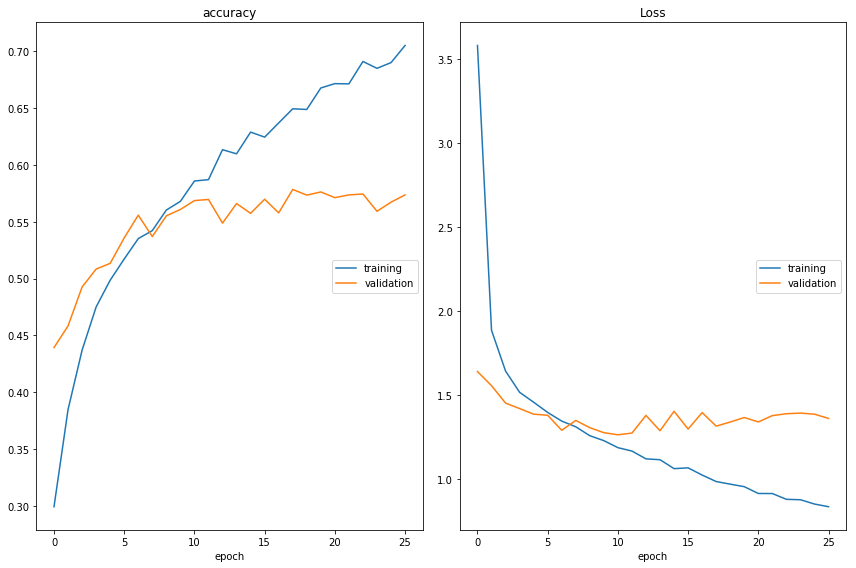

accuracy
	training         	 (min:    0.299, max:    0.705, cur:    0.705)
	validation       	 (min:    0.439, max:    0.579, cur:    0.574)
Loss
	training         	 (min:    0.836, max:    3.583, cur:    0.836)
	validation       	 (min:    1.265, max:    1.641, cur:    1.362)
156/156 [==============================] - 37s 239ms/step - loss: 0.8362 - accuracy: 0.7053 - val_loss: 1.3618 - val_accuracy: 0.5737


In [20]:
plot_loss_2 = PlotLossesCallback()
tl_checkpoint_2 = ModelCheckpoint(filepath='tl_model_v2.weights.best.vgg16',
                                  save_best_only=True,
                                  verbose=1)




# Retrain model with fine-tuning
vgg_ft_history = vgg_model_ft.fit(traingen,
                                  batch_size=BATCH_SIZE,
                                  epochs=n_epochs,
                                  validation_data=validgen,
                                  steps_per_epoch=n_steps, 
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_2, early_stop, plot_loss_2],
                                  verbose=1)

In [16]:
vgg_model_ft.load_weights('tl_model_v2.weights.best.vgg16') 

vgg_preds_ft = vgg_model_ft.predict(testgen)
vgg_pred_classes_ft = np.argmax(vgg_preds_ft, axis=1)

In [17]:
vgg_acc_ft = accuracy_score(true_classes, vgg_pred_classes_ft)
print("Precisión del modelo VGG16 con 2 capas entrenadas: {:.2f}%".format(vgg_acc_ft * 100))

results['Modelo'].append('VGG16-Adam(lr = 0.0001)-ccl-ft2')
results["Accuracy"].append(round(vgg_acc_ft,3))
results["Weighted F1-score"].append(round(f1_score(true_classes, vgg_pred_classes_ft, average = 'weighted'),3))

Precisión del modelo VGG16 con 2 capas entrenadas: 55.20%


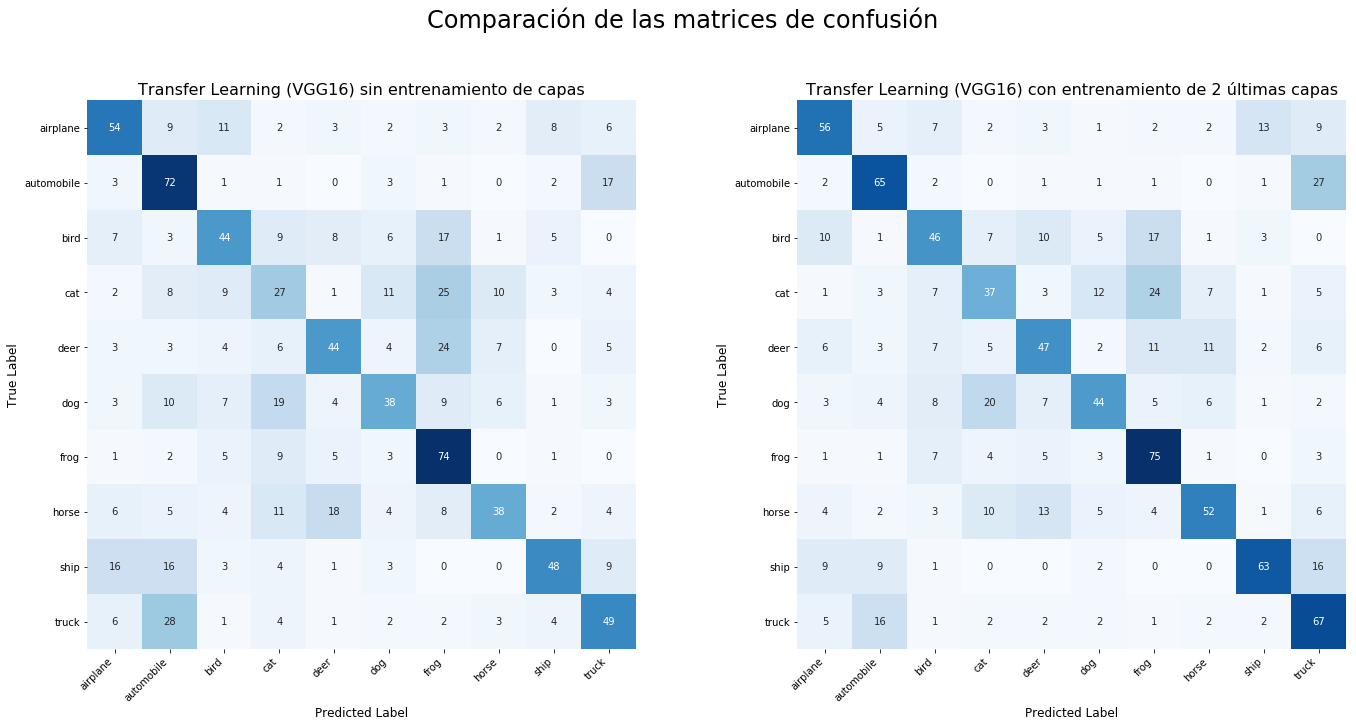

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

class_names = testgen.class_indices.keys()

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
   
plot_heatmap(true_classes, vgg_pred_classes, class_names, ax1, title="Transfer Learning (VGG16) sin entrenamiento de capas")    
plot_heatmap(true_classes, vgg_pred_classes_ft, class_names, ax2, title="Transfer Learning (VGG16) con entrenamiento de 2 últimas capas")    

fig.suptitle("Comparación de las matrices de confusión", fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()

In [16]:
traingen.reset()
validgen.reset()
testgen.reset()


optim_3 = tf.keras.optimizers.SGD(learning_rate=0.001)

# Re-compile the model, this time leaving the last 2 layers unfrozen for Fine-Tuning
vgg_model_ft_2 = create_model(input_shape, optim_3, criterion1, fine_tune=2)

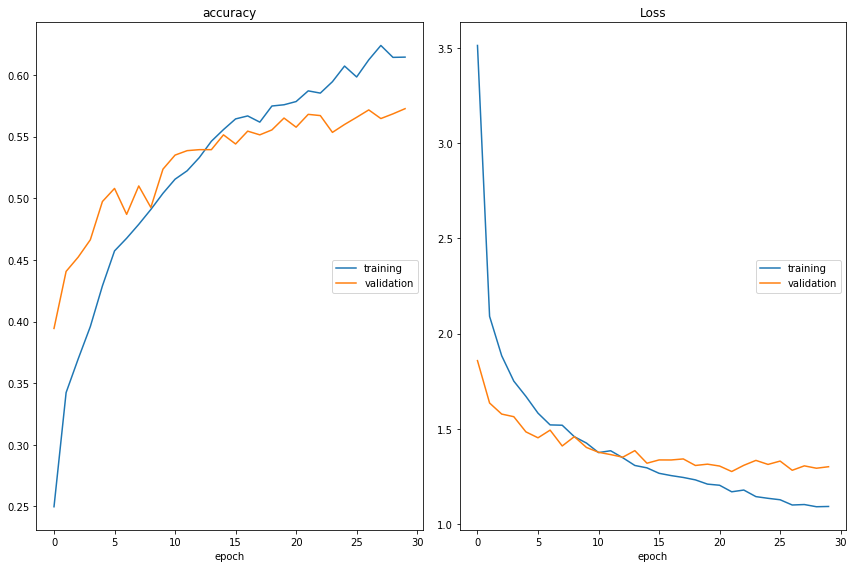

accuracy
	training         	 (min:    0.250, max:    0.624, cur:    0.615)
	validation       	 (min:    0.394, max:    0.573, cur:    0.573)
Loss
	training         	 (min:    1.091, max:    3.513, cur:    1.092)
	validation       	 (min:    1.276, max:    1.858, cur:    1.301)
156/156 [==============================] - 35s 228ms/step - loss: 1.0920 - accuracy: 0.6145 - val_loss: 1.3008 - val_accuracy: 0.5727


In [29]:
plot_loss_3 = PlotLossesCallback()
tl_checkpoint_3 = ModelCheckpoint(filepath='tl_model_v3.weights.best.vgg16',
                                  save_best_only=True,
                                  verbose=1)




# Retrain model with fine-tuning
vgg_ft_history = vgg_model_ft_2.fit(traingen,
                                  batch_size=BATCH_SIZE,
                                  epochs=n_epochs,
                                  validation_data=validgen,
                                  steps_per_epoch=n_steps, 
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_3, early_stop, plot_loss_3],
                                  verbose=1)

In [17]:
vgg_model_ft_2.load_weights('tl_model_v3.weights.best.vgg16') 

vgg_preds_ft_2 = vgg_model_ft_2.predict(testgen)
vgg_pred_classes_ft_2 = np.argmax(vgg_preds_ft_2, axis=1)

In [18]:
vgg_acc_ft_2 = accuracy_score(true_classes, vgg_pred_classes_ft_2)
print("Precisión del modelo VGG16 con 2 capas entrenadas y usando el optimizador SGD: {:.2f}%".format(vgg_acc_ft_2 * 100))

results['Modelo'].append('VGG16-SGD(lr = 0.001)-ccl-ft2')
results["Accuracy"].append(round(vgg_acc_ft_2,3))
results["Weighted F1-score"].append(round(f1_score(true_classes, vgg_pred_classes_ft_2, average = 'weighted'),3))

Precisión del modelo VGG16 con 2 capas entrenadas y usando el optimizador SGD: 54.50%


In [19]:
traingen.reset()
validgen.reset()
testgen.reset()

criterion2 = 'kl_divergence' 
optim_4 = tf.keras.optimizers.SGD(learning_rate=0.0001)
vgg_model_ft_3 = create_model(input_shape, optim_4, criterion2, fine_tune=2)

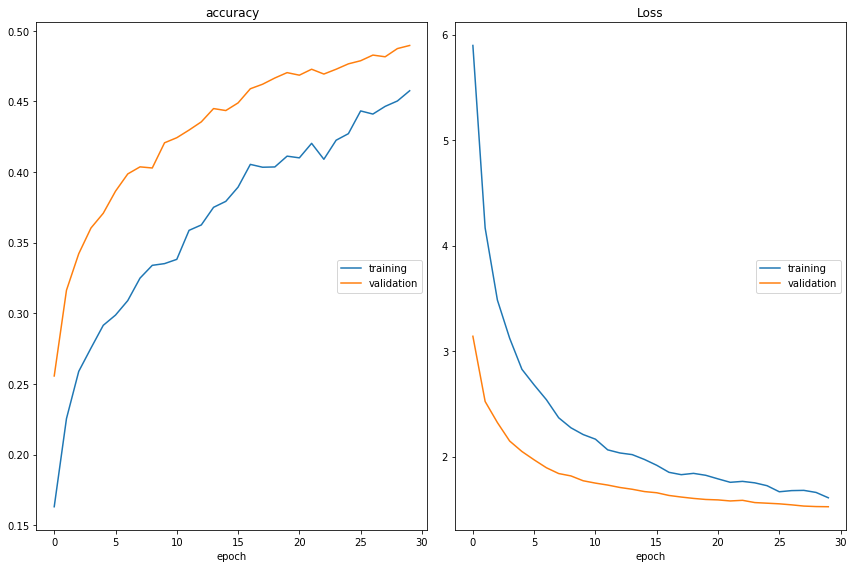

accuracy
	training         	 (min:    0.163, max:    0.458, cur:    0.458)
	validation       	 (min:    0.256, max:    0.490, cur:    0.490)
Loss
	training         	 (min:    1.609, max:    5.897, cur:    1.609)
	validation       	 (min:    1.524, max:    3.140, cur:    1.524)
156/156 [==============================] - 62s 396ms/step - loss: 1.6088 - accuracy: 0.4575 - val_loss: 1.5239 - val_accuracy: 0.4896


In [37]:
plot_loss_4 = PlotLossesCallback()
tl_checkpoint_4 = ModelCheckpoint(filepath='tl_model_v4.weights.best.vgg16',
                                  save_best_only=True,
                                  verbose=1)




# Retrain model with fine-tuning
vgg_ft_history = vgg_model_ft_3.fit(traingen,
                                  batch_size=BATCH_SIZE,
                                  epochs=n_epochs,
                                  validation_data=validgen,
                                  steps_per_epoch=n_steps, 
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_4, early_stop, plot_loss_4],
                                  verbose=1)


In [20]:
vgg_model_ft_3.load_weights('tl_model_v4.weights.best.vgg16') 

vgg_preds_ft_3 = vgg_model_ft_3.predict(testgen)
vgg_pred_classes_ft_3 = np.argmax(vgg_preds_ft_3, axis=1)

In [21]:
vgg_acc_ft_3 = accuracy_score(true_classes, vgg_pred_classes_ft_3)
print("Precisión del modelo VGG16 con 2 capas entrenadas y usando el optimizador SGD: {:.2f}%".format(vgg_acc_ft_3 * 100))

results['Modelo'].append('VGG16-SGD(lr = 0.0001)-kl_div-ft2')
results["Accuracy"].append(round(vgg_acc_ft_3,3))
results["Weighted F1-score"].append(round(f1_score(true_classes, vgg_pred_classes_ft_3, average = 'weighted'),3))

Precisión del modelo VGG16 con 2 capas entrenadas y usando el optimizador SGD: 47.40%


In [22]:
traingen.reset()
validgen.reset()
testgen.reset()

vgg_model_ft_4 = create_model(input_shape, optim_3, criterion1, fine_tune=4)

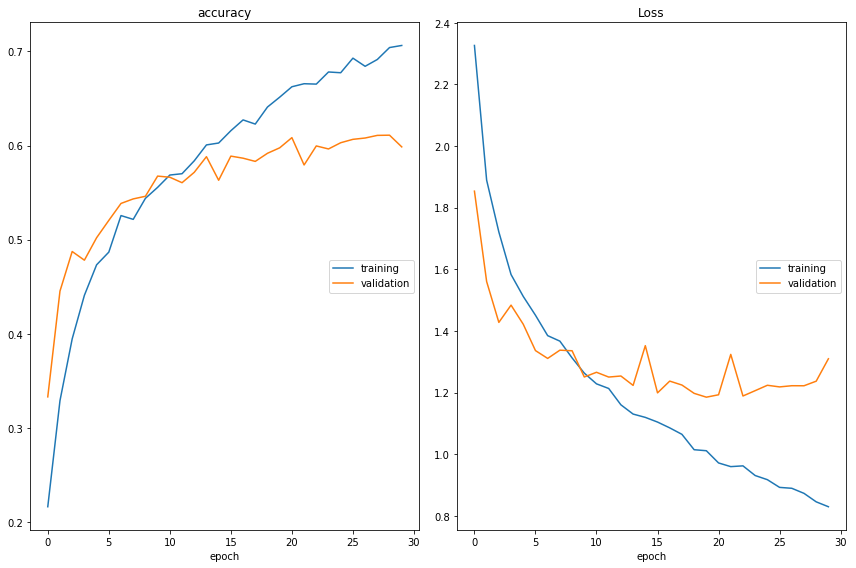

accuracy
	training         	 (min:    0.216, max:    0.706, cur:    0.706)
	validation       	 (min:    0.333, max:    0.611, cur:    0.599)
Loss
	training         	 (min:    0.829, max:    2.326, cur:    0.829)
	validation       	 (min:    1.185, max:    1.853, cur:    1.310)
156/156 [==============================] - 59s 377ms/step - loss: 0.8294 - accuracy: 0.7063 - val_loss: 1.3096 - val_accuracy: 0.5986


In [14]:
plot_loss_5 = PlotLossesCallback()

tl_checkpoint_5 = ModelCheckpoint(filepath='tl_model_v5.weights.best.vgg16',
                                  save_best_only=True,
                                  verbose=1)




# Retrain model with fine-tuning
vgg_ft_history = vgg_model_ft_4.fit(traingen,
                                  batch_size=BATCH_SIZE,
                                  epochs=n_epochs,
                                  validation_data=validgen,
                                  steps_per_epoch=n_steps, 
                                  validation_steps=n_val_steps,
                                  callbacks=[tl_checkpoint_5, early_stop, plot_loss_5],
                                  verbose=1)


In [23]:
vgg_model_ft_4.load_weights('tl_model_v5.weights.best.vgg16') 

vgg_preds_ft_4 = vgg_model_ft_4.predict(testgen)
vgg_pred_classes_ft_4 = np.argmax(vgg_preds_ft_4, axis=1)

In [24]:
vgg_acc_ft_4 = accuracy_score(true_classes, vgg_pred_classes_ft_4)
print("Precisión del modelo VGG16 con 4 capas entrenadas y usando el optimizador SGD: {:.2f}%".format(vgg_acc_ft_4 * 100))

results['Modelo'].append('VGG16-SGD(lr = 0.001)-ccl-ft4')
results["Accuracy"].append(round(vgg_acc_ft_4,3))
results["Weighted F1-score"].append(round(f1_score(true_classes, vgg_pred_classes_ft_4, average = 'weighted'),3))

Precisión del modelo VGG16 con 4 capas entrenadas y usando el optimizador SGD: 60.60%


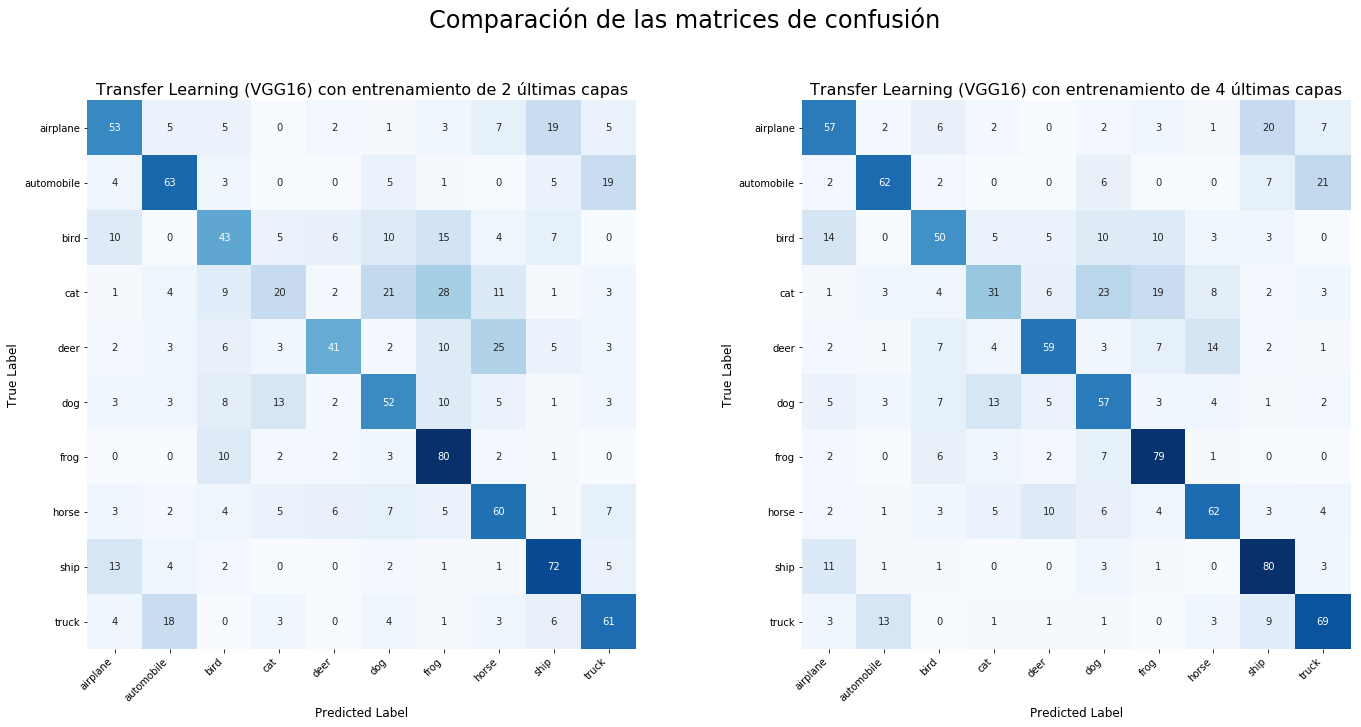

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

plot_heatmap(true_classes, vgg_pred_classes_ft_2, class_names, ax1, title="Transfer Learning (VGG16) con entrenamiento de 2 últimas capas")    
plot_heatmap(true_classes, vgg_pred_classes_ft_4, class_names, ax2, title="Transfer Learning (VGG16) con entrenamiento de 4 últimas capas")    

fig.suptitle("Comparación de las matrices de confusión", fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()

Ahora probamos la arquitectura de resnet-50

In [26]:
traingen.reset()
validgen.reset()
testgen.reset()

In [27]:
def create_Resnetmodel(input_shape, optimizer,loss_criterion, fine_tune=0):
    """
    Compila un modelo entrenado con las capas de RESNET-50
    
    input_shape: tupla - tamaño de las imágenes de entrada en forma (width, height, channels)
    optimizer: string - optimizador a utilizar en el entrenamiento para la actualización de pesos en el proceso de backpropagation'
    loss_criterion: string - función de pérdida para medir el rendimiento de la red
    fine_tune: int - Número de capas del modelo preentrenado a entrenar.
                Si es 0, todas las capas preentrenadas se 'congelan' en el entrenamiento
    """
    
    # Las capas preentrenadas utilizan en este caso pesos del dataset de imagenet.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    model_pre = keras.applications.ResNet50(weights='imagenet', 
                                       input_shape=input_shape, 
                                       include_top=False)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in model_pre.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in model_pre.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    
    top_model = model_pre.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = BatchNormalization()(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    top_model = BatchNormalization()(top_model)
    top_model = Dense(128, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    top_model = BatchNormalization()(top_model)
    top_model = Dense(64, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    top_model = BatchNormalization()(top_model)
    
    output_layer = Dense(10, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=model_pre.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss=loss_criterion,
                  metrics=['accuracy'])
    
    return model

In [28]:
input_shape = (32, 32, 3)
optim_1 =  tf.keras.optimizers.RMSprop(learning_rate=0.001)
criterion1 = 'categorical_crossentropy'

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 25

# First we'll train the model without Fine-tuning

resnet50_model = create_Resnetmodel(input_shape, optim_1, criterion1, fine_tune=0)

In [29]:
from livelossplot.tf_keras import PlotLossesCallback

plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.resnet50',
                                  save_best_only=True,
                                  verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

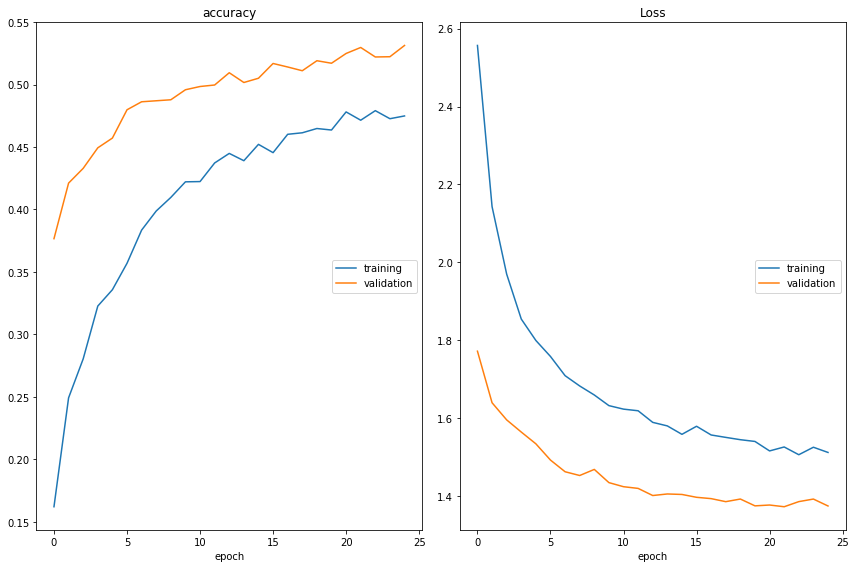

accuracy
	training         	 (min:    0.162, max:    0.479, cur:    0.475)
	validation       	 (min:    0.377, max:    0.531, cur:    0.531)
Loss
	training         	 (min:    1.506, max:    2.557, cur:    1.512)
	validation       	 (min:    1.372, max:    1.772, cur:    1.374)
156/156 [==============================] - 52s 333ms/step - loss: 1.5117 - accuracy: 0.4748 - val_loss: 1.3742 - val_accuracy: 0.5312


In [11]:
resnet_history = resnet50_model.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

In [30]:
resnet50_model.load_weights('tl_model_v1.weights.best.resnet50') # initialize the best trained weights

resnet50_preds = resnet50_model.predict(testgen)
resnet50_pred_classes = np.argmax(resnet50_preds, axis=1)

In [31]:
resnet50_acc = accuracy_score(true_classes, resnet50_pred_classes)
print("Precisión del modelo resnet50 sin capas entrenadas: {:.2f}%".format(resnet50_acc * 100))

results['Modelo'].append('Resnet50-RMSprop(lr = 0.001)-ccl-ft0')
results["Accuracy"].append(round(resnet50_acc,3))
results["Weighted F1-score"].append(round(f1_score(true_classes, resnet50_pred_classes, average = 'weighted'),3))

Precisión del modelo resnet50 sin capas entrenadas: 53.20%


In [32]:
traingen.reset()
validgen.reset()
testgen.reset()

resnet50_model_ft = create_Resnetmodel(input_shape, optim_1, criterion1, fine_tune=2)

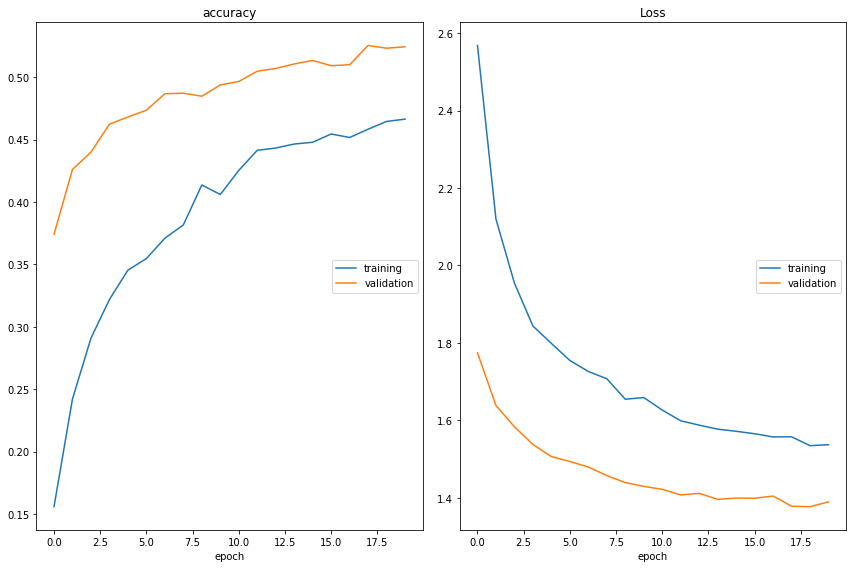

accuracy
	training         	 (min:    0.156, max:    0.466, cur:    0.466)
	validation       	 (min:    0.374, max:    0.525, cur:    0.524)
Loss
	training         	 (min:    1.535, max:    2.568, cur:    1.537)
	validation       	 (min:    1.377, max:    1.775, cur:    1.390)
156/156 [==============================] - 79s 509ms/step - loss: 1.5372 - accuracy: 0.4664 - val_loss: 1.3898 - val_accuracy: 0.5244


In [42]:
n_epochs = 20
plot_loss_2 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_2 = ModelCheckpoint(filepath='tl_model_v2.weights.best.resnet50',
                                  save_best_only=True,
                                  verbose=1)

resnet_history = resnet50_model_ft.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_2, early_stop, plot_loss_2],
                            verbose=1)

In [33]:
resnet50_model_ft.load_weights('tl_model_v2.weights.best.resnet50') # initialize the best trained weights

resnet50_preds_ft = resnet50_model_ft.predict(testgen)
resnet50_pred_classes_ft = np.argmax(resnet50_preds_ft, axis=1)

In [34]:
resnet50_acc_ft = accuracy_score(true_classes, resnet50_pred_classes_ft)
print("Precisión del modelo resnet50 con 2 capas entrenadas: {:.2f}%".format(resnet50_acc_ft * 100))

results['Modelo'].append('Resnet50-RMSprop(lr = 0.001)-ccl-ft2')
results["Accuracy"].append(round(resnet50_acc_ft,3))
results["Weighted F1-score"].append(round(f1_score(true_classes, resnet50_pred_classes_ft, average = 'weighted'),3))

Precisión del modelo resnet50 con 2 capas entrenadas: 52.00%


In [35]:
traingen.reset()
validgen.reset()
testgen.reset()

optim_2 = tf.keras.optimizers.RMSprop(learning_rate=0.001)

resnet50_model_ft2 = create_Resnetmodel(input_shape, optim_2, criterion1, fine_tune=11)

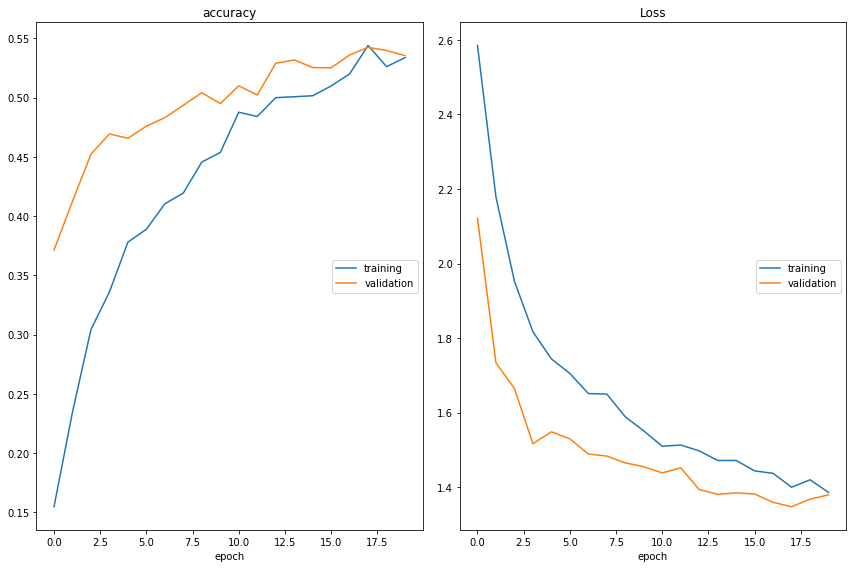

accuracy
	training         	 (min:    0.155, max:    0.544, cur:    0.534)
	validation       	 (min:    0.371, max:    0.542, cur:    0.535)
Loss
	training         	 (min:    1.386, max:    2.585, cur:    1.386)
	validation       	 (min:    1.347, max:    2.121, cur:    1.379)
156/156 [==============================] - 72s 460ms/step - loss: 1.3859 - accuracy: 0.5338 - val_loss: 1.3793 - val_accuracy: 0.5355


In [23]:
n_epochs = 20
plot_loss_3 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_3 = ModelCheckpoint(filepath='tl_model_v3.weights.best.resnet50',
                                  save_best_only=True,
                                  verbose=1)

resnet_history = resnet50_model_ft2.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_3, early_stop, plot_loss_3],
                            verbose=1)

In [36]:
resnet50_model_ft2.load_weights('tl_model_v3.weights.best.resnet50') # initialize the best trained weights

resnet50_preds_ft2 = resnet50_model_ft2.predict(testgen)
resnet50_pred_classes_ft2 = np.argmax(resnet50_preds_ft2, axis=1)

In [37]:
resnet50_acc_ft2 = accuracy_score(true_classes, resnet50_pred_classes_ft2)
print("Precisión del modelo resnet50 con 2 capas entrenadas: {:.2f}%".format(resnet50_acc_ft2 * 100))

results['Modelo'].append('Resnet50-RMSprop(lr = 0.001)-ccl-ft11')
results["Accuracy"].append(round(resnet50_acc_ft2,3))
results["Weighted F1-score"].append(round(f1_score(true_classes, resnet50_pred_classes_ft2, average = 'weighted'),3))

Precisión del modelo resnet50 con 2 capas entrenadas: 55.50%


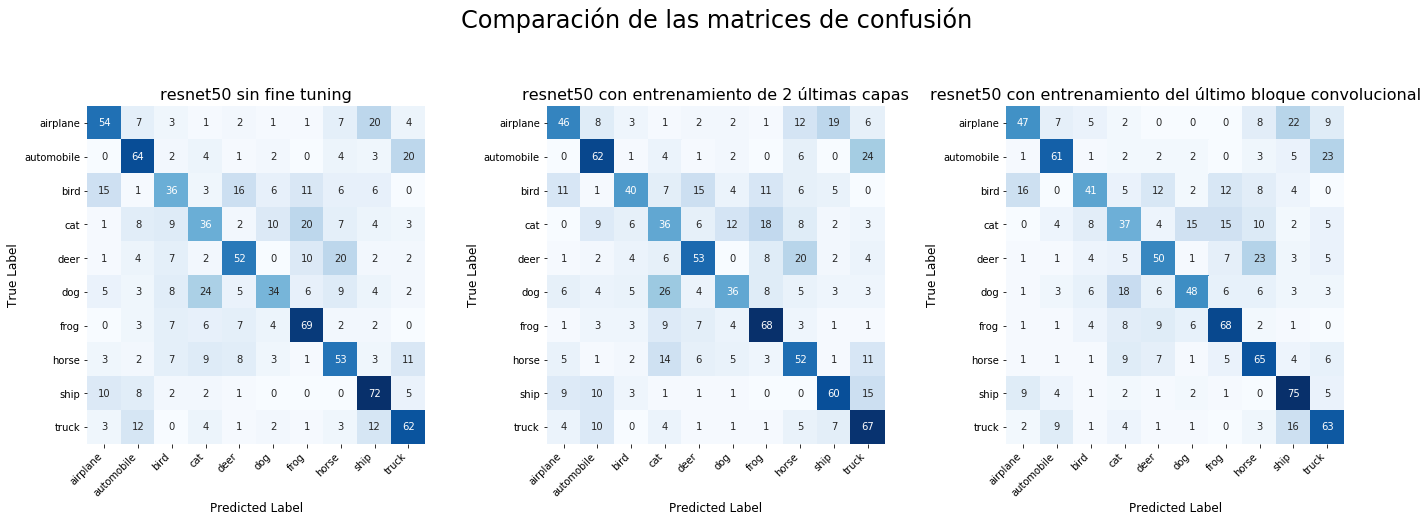

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

plot_heatmap(true_classes, resnet50_pred_classes, class_names, ax1, title="resnet50 sin fine tuning")    
plot_heatmap(true_classes, resnet50_pred_classes_ft, class_names, ax2, title="resnet50 con entrenamiento de 2 últimas capas")    
plot_heatmap(true_classes, resnet50_pred_classes_ft2, class_names, ax3, title="resnet50 con entrenamiento del último bloque convolucional")    

fig.suptitle("Comparación de las matrices de confusión", fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=1.2)
plt.show()

Por último, escogemos la arquitectura de Xception.

In [20]:
traingen.reset()
validgen.reset()
testgen.reset()

In [21]:
def create_Xceptionmodel(input_shape, optimizer,loss_criterion, fine_tune=0):
    """
    Compila un modelo entrenado con las capas de Xception
    
    input_shape: tupla - tamaño de las imágenes de entrada en forma (width, height, channels)
    optimizer: string - optimizador a utilizar en el entrenamiento para la actualización de pesos en el proceso de backpropagation'
    loss_criterion: string - función de pérdida para medir el rendimiento de la red
    fine_tune: int - Número de capas del modelo preentrenado a entrenar.
                Si es 0, todas las capas preentrenadas se 'congelan' en el entrenamiento
    """
    
    # Las capas preentrenadas utilizan en este caso pesos del dataset de imagenet.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    model_pre = keras.applications.ResNet50(weights='imagenet', 
                                       input_shape=input_shape, 
                                       include_top=False)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in model_pre.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in model_pre.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    
    top_model = model_pre.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dropout(0.25)(top_model)
    
    output_layer = Dense(10, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=model_pre.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss=loss_criterion,
                  metrics=['accuracy'])
    
    return model

In [22]:
optim_1 =  tf.keras.optimizers.Adam(learning_rate=0.001)
criterion1 = 'categorical_crossentropy'

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 25

# First we'll train the model without Fine-tuning

xception_model = create_Xceptionmodel(input_shape, optim_1, criterion1, fine_tune=0)

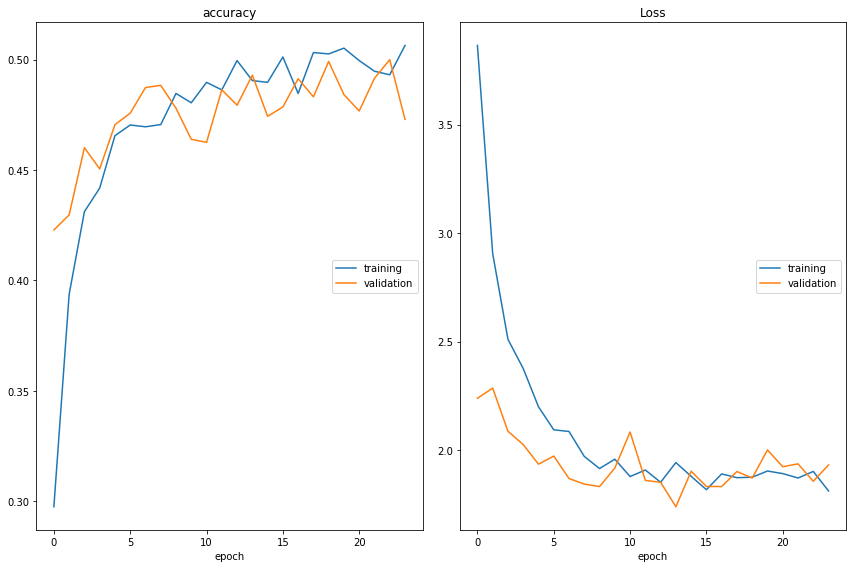

accuracy
	training         	 (min:    0.298, max:    0.506, cur:    0.506)
	validation       	 (min:    0.423, max:    0.500, cur:    0.473)
Loss
	training         	 (min:    1.812, max:    3.865, cur:    1.812)
	validation       	 (min:    1.739, max:    2.286, cur:    1.932)
156/156 [==============================] - 72s 461ms/step - loss: 1.8120 - accuracy: 0.5064 - val_loss: 1.9320 - val_accuracy: 0.4730


In [34]:
plot_loss_1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.xception',
                                  save_best_only=True,
                                  verbose=1)


xception_history = xception_model.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_1, early_stop, plot_loss_1],
                            verbose=1)

In [23]:
xception_model.load_weights('tl_model_v1.weights.best.xception') # initialize the best trained weights

xception_preds = xception_model.predict(testgen)
xception_pred_classes = np.argmax(xception_preds, axis=1)

In [24]:
xception_acc = accuracy_score(true_classes, xception_pred_classes)
print("Precisión del modelo xception sin capas entrenadas: {:.2f}%".format(xception_acc * 100))

results['Modelo'].append('Xception-Adam(lr = 0.001)-ccl-ft0')
results["Accuracy"].append(round(xception_acc,3))
results["Weighted F1-score"].append(round(f1_score(true_classes, xception_pred_classes, average = 'weighted'),3))

Precisión del modelo xception sin capas entrenadas: 51.80%


In [25]:
traingen.reset()
validgen.reset()
testgen.reset()

optim_2 = tf.keras.optimizers.Adam(learning_rate=0.0001)

xception_model_ft = create_Xceptionmodel(input_shape, optim_2, criterion1, fine_tune=4)

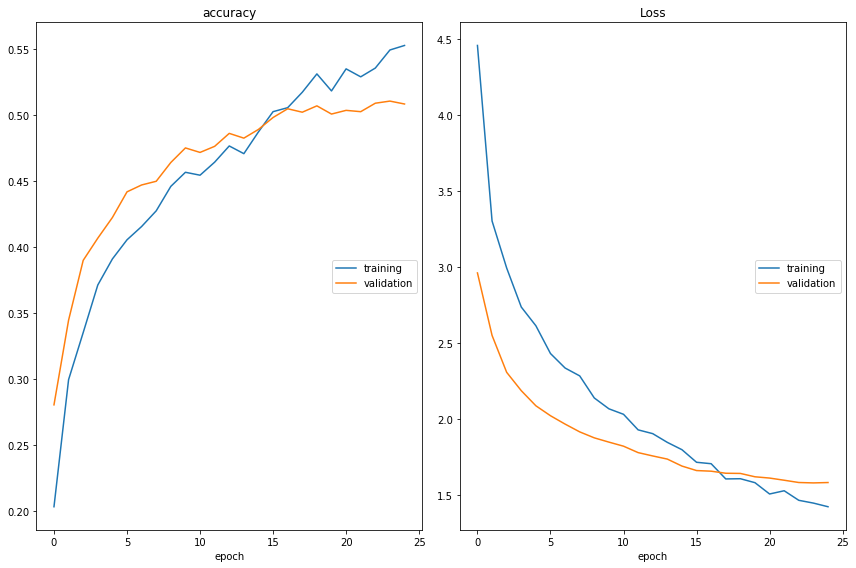

accuracy
	training         	 (min:    0.203, max:    0.553, cur:    0.553)
	validation       	 (min:    0.280, max:    0.510, cur:    0.508)
Loss
	training         	 (min:    1.423, max:    4.456, cur:    1.423)
	validation       	 (min:    1.580, max:    2.960, cur:    1.582)
156/156 [==============================] - 63s 404ms/step - loss: 1.4228 - accuracy: 0.5525 - val_loss: 1.5820 - val_accuracy: 0.5082


In [22]:
plot_loss_2 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_2 = ModelCheckpoint(filepath='tl_model_v2.weights.best.xception',
                                  save_best_only=True,
                                  verbose=1)


xception_history = xception_model_ft.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_2, early_stop, plot_loss_2],
                            verbose=1)

In [26]:
xception_model_ft.load_weights('tl_model_v2.weights.best.xception') # initialize the best trained weights

xception_preds_ft = xception_model_ft.predict(testgen)
xception_pred_classes_ft = np.argmax(xception_preds_ft, axis=1)

In [27]:
xception_acc_ft = accuracy_score(true_classes, xception_pred_classes_ft)
print("Precisión del modelo xception con las 4 últimas capas entrenadas: {:.2f}%".format(xception_acc_ft * 100))

results['Modelo'].append('Xception-Adam(lr = 0.0001)-ccl-ft4')
results["Accuracy"].append(round(xception_acc_ft,3))
results["Weighted F1-score"].append(round(f1_score(true_classes, xception_pred_classes_ft, average = 'weighted'),3))

Precisión del modelo xception con las 4 últimas capas entrenadas: 50.40%


In [28]:
traingen.reset()
validgen.reset()
testgen.reset()

optim_3 = tf.keras.optimizers.SGD(learning_rate=0.0001)
criterion2 = 'kl_divergence'

xception_model_ft2 = create_Xceptionmodel(input_shape, optim_3, criterion2, fine_tune=8)

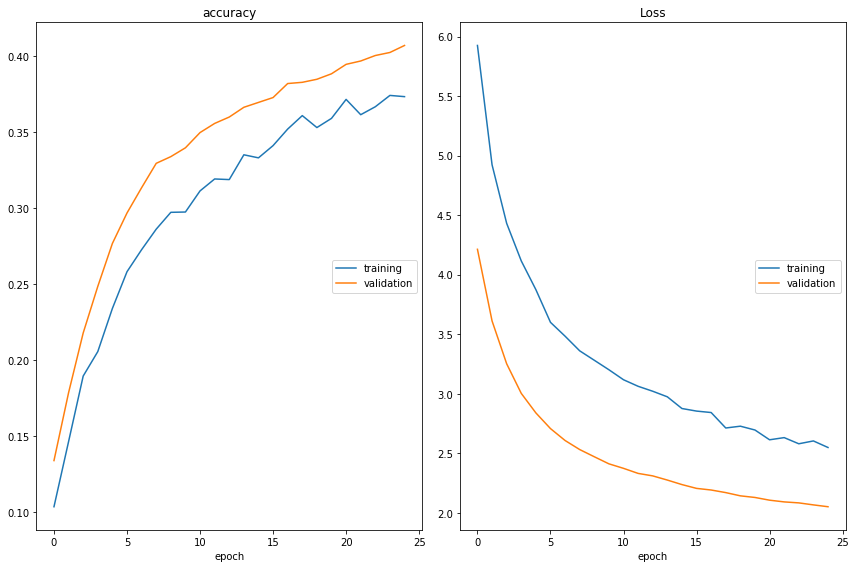

accuracy
	training         	 (min:    0.104, max:    0.374, cur:    0.373)
	validation       	 (min:    0.134, max:    0.407, cur:    0.407)
Loss
	training         	 (min:    2.548, max:    5.926, cur:    2.548)
	validation       	 (min:    2.051, max:    4.213, cur:    2.051)
156/156 [==============================] - 94s 602ms/step - loss: 2.5483 - accuracy: 0.3734 - val_loss: 2.0507 - val_accuracy: 0.4071


In [48]:
plot_loss_3 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_3 = ModelCheckpoint(filepath='tl_model_v3.weights.best.xception',
                                  save_best_only=True,
                                  verbose=1)


xception_history = xception_model_ft2.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            callbacks=[tl_checkpoint_3, early_stop, plot_loss_3],
                            verbose=1)

In [29]:
xception_model_ft2.load_weights('tl_model_v3.weights.best.xception') # initialize the best trained weights

xception_preds_ft2 = xception_model_ft2.predict(testgen)
xception_pred_classes_ft2 = np.argmax(xception_preds_ft2, axis=1)

In [30]:
xception_acc_ft2 = accuracy_score(true_classes, xception_pred_classes_ft2)
print("Precisión del modelo xception con las 4 últimas capas entrenadas: {:.2f}%".format(xception_acc_ft2 * 100))

results['Modelo'].append('Xception-SGD(lr = 0.0001)-kl_div-ft8')
results["Accuracy"].append(round(xception_acc_ft2,3))
results["Weighted F1-score"].append(round(f1_score(true_classes, xception_pred_classes_ft2, average = 'weighted'),3))

Precisión del modelo xception con las 4 últimas capas entrenadas: 41.80%


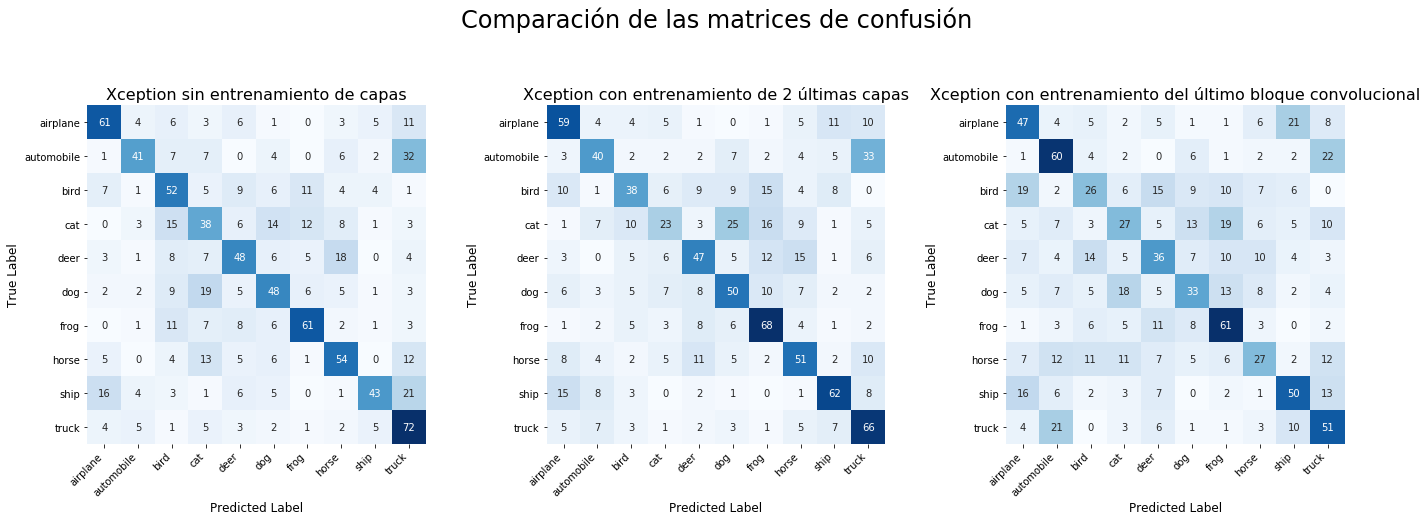

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

plot_heatmap(true_classes, xception_pred_classes, class_names, ax1, title="Xception sin entrenamiento de capas")    
plot_heatmap(true_classes, xception_pred_classes_ft, class_names, ax2, title="Xception con entrenamiento de 2 últimas capas")    
plot_heatmap(true_classes, xception_pred_classes_ft2, class_names, ax3, title="Xception con entrenamiento del último bloque convolucional")    

fig.suptitle("Comparación de las matrices de confusión", fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=1.2)
plt.show()

In [55]:
import pandas as pd
df_res = pd.DataFrame.from_dict(results)
df_res

,Modelo,Accuracy,Weighted F1-score
0,VGG16-Adam(lr = 0.001)-ccl-ft0,0.488,0.482
1,VGG16-Adam(lr = 0.0001)-ccl-ft2,0.552,0.549
2,VGG16-SGD(lr = 0.001)-ccl-ft2,0.545,0.534
3,VGG16-SGD(lr = 0.0001)-kl_div-ft2,0.474,0.462
4,VGG16-SGD(lr = 0.001)-ccl-ft4,0.606,0.600
5,Resnet50-RMSprop(lr = 0.001)-ccl-ft0,0.532,0.525
6,Resnet50-RMSprop(lr = 0.001)-ccl-ft2,0.520,0.517
7,Resnet50-RMSprop(lr = 0.001)-ccl-ft11,0.555,0.551
8,Xception-Adam(lr = 0.001)-ccl-ft0,0.518,0.518
9,Xception-Adam(lr = 0.0001)-ccl-ft4,0.504,0.496
